In [49]:
import os
import numpy as np
import pandas as pd
import h5py 

import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
ophys_session_dir = r"\\allen\programs\braintv\production\neuralcoding\prod0\specimen_589751232\ophys_session_614048628"

In [51]:
analysis_dir = r'\\allen\programs\braintv\workgroups\nc-ophys\BehaviorImaging\DoC\2P6_data_analysis'

In [52]:
mouse_id = 324022

In [53]:
from visual_behavior_ophys.dataset.visual_behavior_scientifica_dataset import VisualBehaviorScientificaDataset

In [54]:
dataset= VisualBehaviorScientificaDataset(ophys_session_dir, mouse_id=324022, analysis_dir = analysis_dir)

Visual frames detected in sync: 215791
2P frames detected in sync: 111606
170829
visual frames in pkl file: 215791
Loading \\allen\programs\braintv\workgroups\neuralcoding\Behavior\Data\M324022\output\170829113856-task=DoC_NaturalImages_Ophys_SessionA_stage=natural_images_ophys_sessionA_mouse=M324022.pkl
stim type is  images
filter edge cells = True
length of traces: 111604
number of segmented cells: 123


In [55]:
from visual_behavior_ophys.response_analysis.response_analysis import ResponseAnalysis 

In [56]:
ra = ResponseAnalysis(dataset)

length of traces: 111604
number of segmented cells: 123
loading response dataframe
done


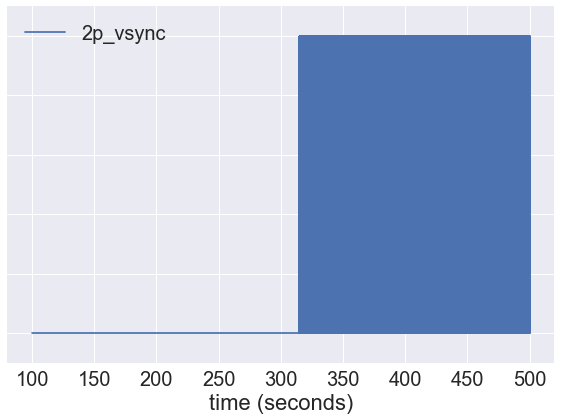

In [64]:
dataset.sync_data.plot_lines(['2p_vsync'],start_time=100,end_time=500)

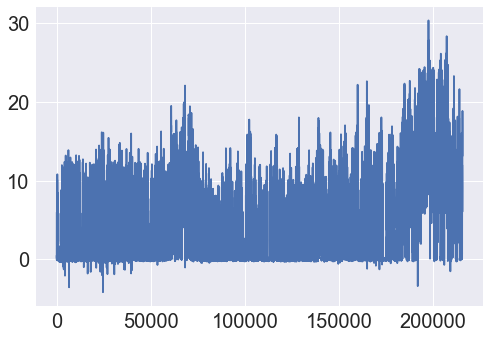

In [63]:
plt.plot(dataset.running_speed)

In [57]:
# rdf = ra.get_response_dataframe()
# dataset.response_df = rdf

In [58]:
from visual_behavior_ophys.plotting_tools import summary_figures as sf

In [59]:
sf.plot_behavior_events_trace(dataset, range(dataset.dff_traces.shape[0]), xmin=1500, length=10, ax=None, save=True)

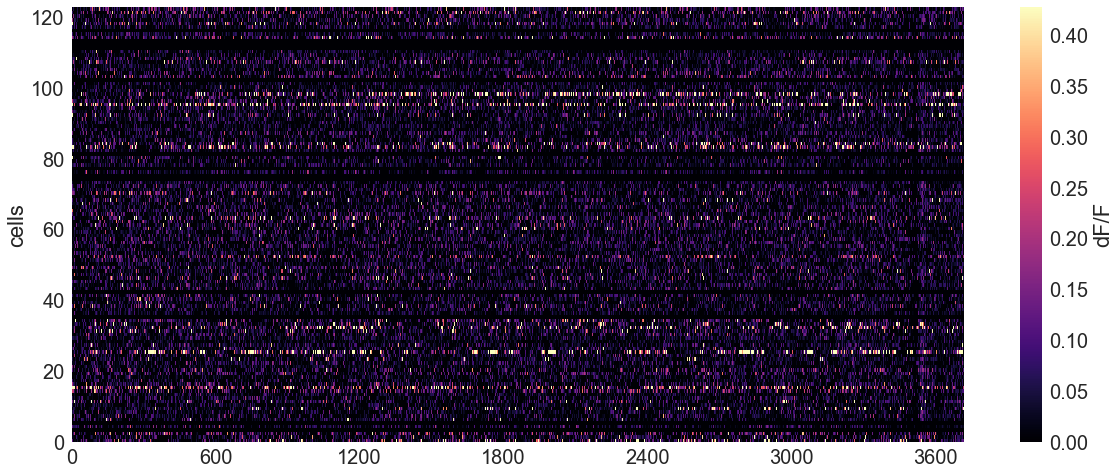

In [60]:
sf.plot_traces_heatmap(dataset, save=True, cbar=True, ax=None)

In [61]:
from visual_behavior_ophys.plotting_tools import basic_plotting as bp

In [62]:
for roi in range(dataset.dff_traces.shape[0]):
    figsize=(20, 5)
    fig,ax = plt.subplots(figsize=figsize)
    bp.plot_trace(dataset.dff_traces[roi], ylabel='dF/F', interval=5, ax=ax)
    sf.save_figure(fig, figsize, dataset.analysis_dir, 'dff_traces', 'roi_'+str(roi), formats=['.png'])
    plt.close()